# Activity 1.2 : Training Neural Networks


*   Name: Estacion, Kenneth

https://colab.research.google.com/drive/1c5kjJt4JwGbEtTn5xeWKtjXMlwUGAb3S?usp=sharing
---


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

filepath = "/content/drive/MyDrive/Year3/DATASCI/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
675,6,195,70,0,0,30.9,0.328,31,1
536,0,105,90,0,0,29.6,0.197,46,0
727,0,141,84,26,0,32.4,0.433,22,0
394,4,158,78,0,0,32.9,0.803,31,1
514,3,99,54,19,86,25.6,0.154,24,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 3s 35ms/step - loss: 0.8902 - accuracy: 0.3681 - val_loss: 0.8741 - val_accuracy: 0.3802
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.8724 - accuracy: 0.3698 - val_loss: 0.8573 - val_accuracy: 0.3854
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 0.8559 - accuracy: 0.3733 - val_loss: 0.8417 - val_accuracy: 0.3802
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.8406 - accuracy: 0.3837 - val_loss: 0.8273 - val_accuracy: 0.3854
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.8263 - accuracy: 0.3837 - val_loss: 0.8139 - val_accuracy: 0.4062
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.8131 - accuracy: 0.3924 - val_loss: 0.8015 - val_accuracy: 0.4167
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.8007 - accuracy: 0.3993 - val_loss: 0.7899 - val_accuracy: 0.4219
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn = model.predict(X_test_norm)
y_pred_class_nn = (y_pred_prob_nn > 0.5).astype("int32")

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn[:10]

array([[0.46809953],
       [0.7207454 ],
       [0.3464032 ],
       [0.25447136],
       [0.29647008],
       [0.5776339 ],
       [0.08084681],
       [0.38042706],
       [0.6935203 ],
       [0.21185233]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.805


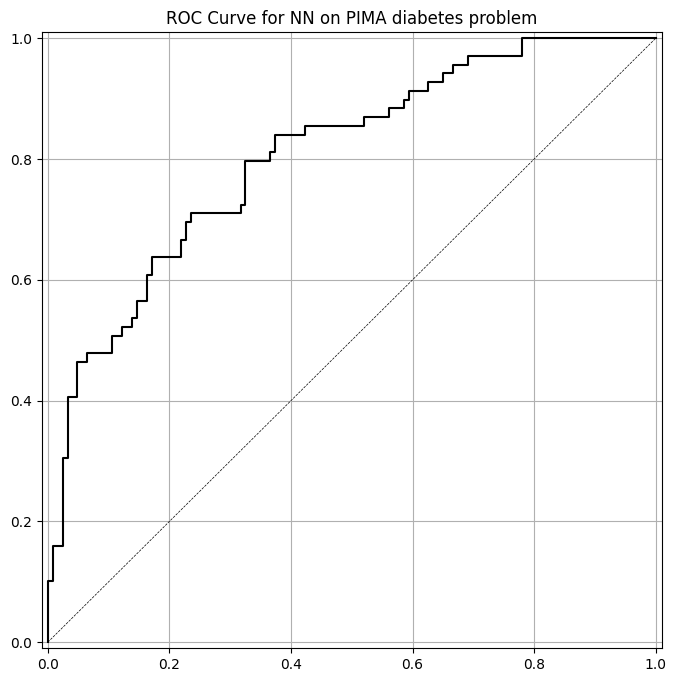

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn)))

plot_roc(y_test, y_pred_prob_nn, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

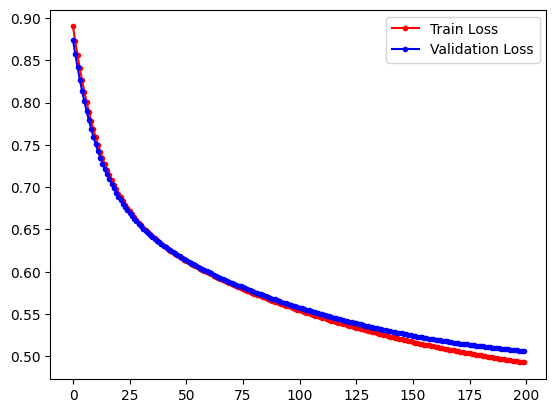

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#What is your interpretation about the result of the train and validation loss?

From the first epoch, the train and validation losses are almost at 0.9. Then, they drastically decreased to 0.5. At about 40th epoch, the validation loss became higher than the train loss. Then, their gap widen a little bit and will probably converge at 0.5. This indicates a good fit since it has a low loss values and a converging loss values in both training and validation dataset .

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

def plot_loss(run_hist, y_test, y_pred_class, y_pred_prob):
    fig, ax = plt.subplots()
    ax.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
    ax.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
    ax.text(0.85, 0.85,'accuracy is {:.4f}'.format(accuracy_score(y_test,y_pred_class)), fontsize=9)
    ax.text(0.85, 1.85,'roc-auc is {:.4f}'.format(accuracy_score(y_test,y_pred_class)), fontsize=9)
    ax.legend()

In [ ]:
path = "/content/drive/Shareddrives/CPE312/HOA4/"
csv_path = path+'cancer.csv'
df = pd.read_csv(csv_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.drop(["id"], axis=1, inplace=True)
for col in df.columns:
    df[col].replace('?', np.nan, inplace=True)
    df[col].replace('', np.nan, inplace=True)

df["diagnosis"].replace({'B': 0, 'M': 1}, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[Text(0, 0, '0 (Benign)'), Text(1, 0, '1 (Malignant)')]

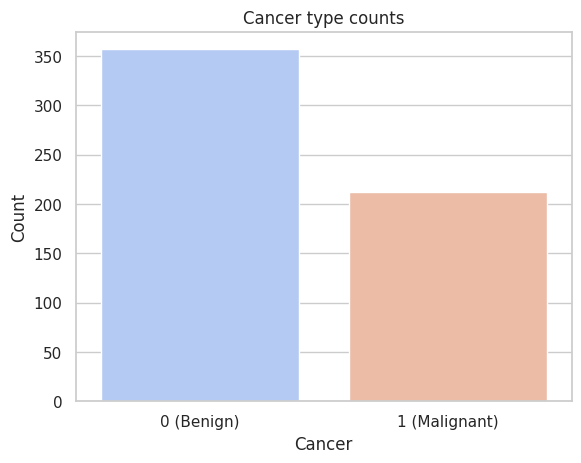

In [ ]:
sns.set(style="whitegrid")
plt.title('Cancer type counts')
ax = sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='coolwarm', legend=False)
plt.xlabel('Cancer')
plt.ylabel('Count')
ax.set_xticks([0, 1])
ax.set_xticklabels(['0 (Benign)', '1 (Malignant)'])

In [ ]:
my_model = Sequential([
    Dense(6, input_shape=(30,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 186       
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 235 (940.00 Byte)
Trainable params: 235 (940.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X = df.iloc[:, 1:].values
y = df["diagnosis"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

#### Conclusion

In [ ]:

my_model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
my_run_hist = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)


Epoch 1/1500
14/14 [==============================] - 2s 22ms/step - loss: 0.9312 - accuracy: 0.3803 - val_loss: 0.9963 - val_accuracy: 0.3077
Epoch 2/1500
14/14 [==============================] - 0s 6ms/step - loss: 0.8992 - accuracy: 0.3850 - val_loss: 0.9560 - val_accuracy: 0.3077
Epoch 3/1500
14/14 [==============================] - 0s 5ms/step - loss: 0.8713 - accuracy: 0.3756 - val_loss: 0.9207 - val_accuracy: 0.3147
Epoch 4/1500
14/14 [==============================] - 0s 6ms/step - loss: 0.8468 - accuracy: 0.3732 - val_loss: 0.8910 - val_accuracy: 0.3147
Epoch 5/1500
14/14 [==============================] - 0s 5ms/step - loss: 0.8261 - accuracy: 0.3685 - val_loss: 0.8651 - val_accuracy: 0.3147
Epoch 6/1500
14/14 [==============================] - 0s 5ms/step - loss: 0.8080 - accuracy: 0.3662 - val_loss: 0.8428 - val_accuracy: 0.3147
Epoch 7/1500
14/14 [==============================] - 0s 5ms/step - loss: 0.7923 - accuracy: 0.3662 - val_loss: 0.8229 - val_accuracy: 0.3217
Epoch

In [ ]:
my_y_pred_prob_nn = my_model.predict(X_test_norm)
my_y_pred_class_nn = (my_y_pred_prob_nn > 0.5).astype("int32")

5/5 [==============================] - 0s 6ms/step


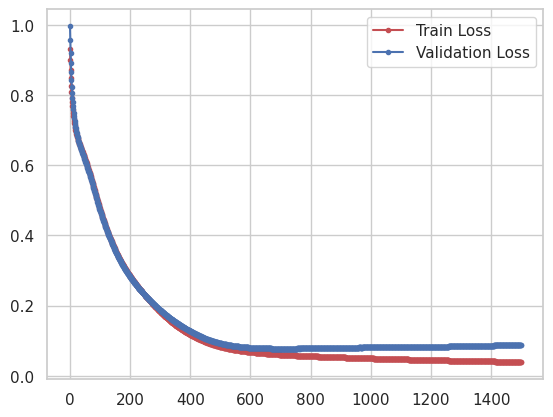

In [ ]:
fig, ax = plt.subplots()
ax.plot(my_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

accuracy is 0.979
roc-auc is 0.996


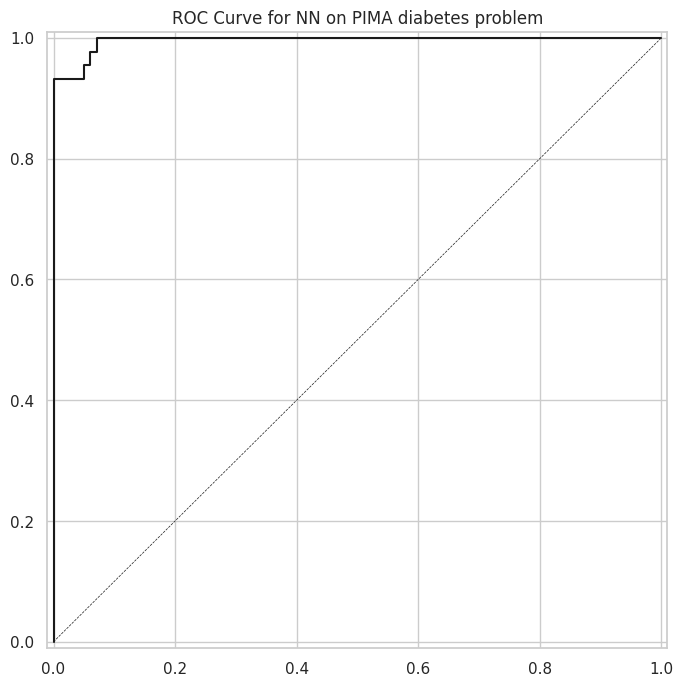

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,my_y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,my_y_pred_prob_nn)))

plot_roc(y_test, my_y_pred_prob_nn, 'NN')

##Different learning rate

Epoch 1/1500
14/14 [==============================] - 1s 14ms/step - loss: 0.0266 - accuracy: 0.9930 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch 2/1500
14/14 [==============================] - 0s 6ms/step - loss: 0.0266 - accuracy: 0.9930 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch 3/1500
14/14 [==============================] - 0s 9ms/step - loss: 0.0266 - accuracy: 0.9930 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch 4/1500
14/14 [==============================] - 0s 6ms/step - loss: 0.0266 - accuracy: 0.9930 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch 5/1500
14/14 [==============================] - 0s 6ms/step - loss: 0.0266 - accuracy: 0.9930 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch 6/1500
14/14 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9930 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch 7/1500
14/14 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9930 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch

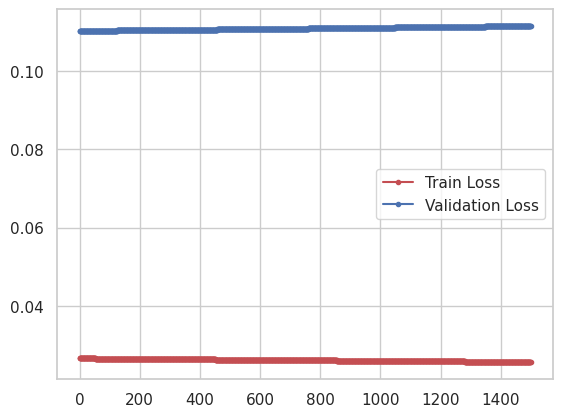

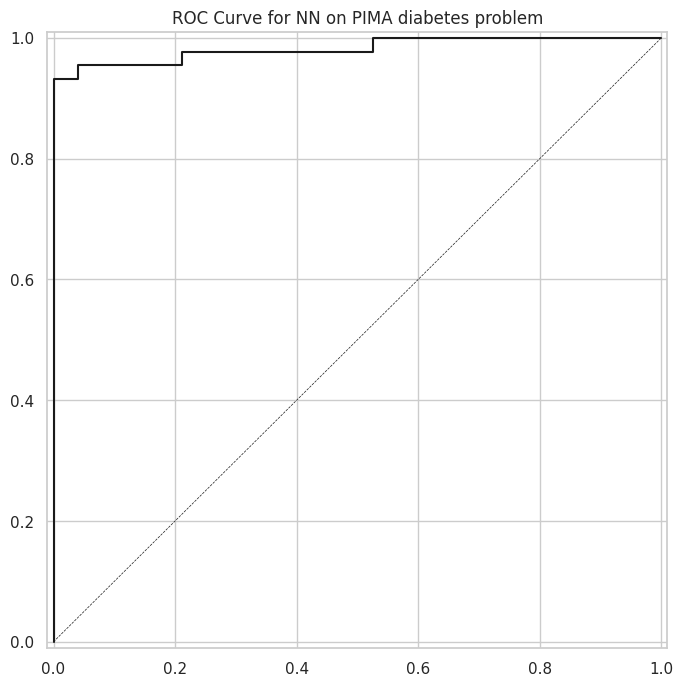

In [ ]:
my_model.compile(SGD(learning_rate = .0001), "binary_crossentropy", metrics=["accuracy"])
my_run_hist = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)
my_y_pred_prob_nn = my_model.predict(X_test_norm)
my_y_pred_class_nn = (my_y_pred_prob_nn > 0.5).astype("int32")
fig, ax = plt.subplots()
ax.plot(my_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
print('accuracy is {:.3f}'.format(accuracy_score(y_test,my_y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,my_y_pred_prob_nn)))

plot_roc(y_test, my_y_pred_prob_nn, 'NN')

##Different epoch

Epoch 1/800
14/14 [==============================] - 3s 72ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.1363 - val_accuracy: 0.9790
Epoch 2/800
14/14 [==============================] - 0s 11ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.1364 - val_accuracy: 0.9790
Epoch 3/800
14/14 [==============================] - 0s 10ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.1364 - val_accuracy: 0.9790
Epoch 4/800
14/14 [==============================] - 0s 12ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.1363 - val_accuracy: 0.9790
Epoch 5/800
14/14 [==============================] - 0s 12ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.1363 - val_accuracy: 0.9790
Epoch 6/800
14/14 [==============================] - 0s 20ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.1364 - val_accuracy: 0.9790
Epoch 7/800
14/14 [==============================] - 0s 18ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.1365 - val_accuracy: 0.9790
Epoch 

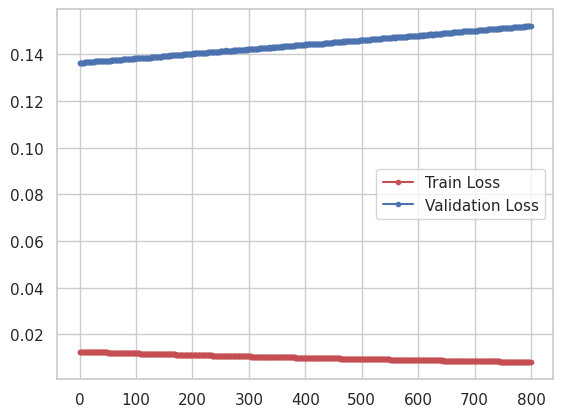

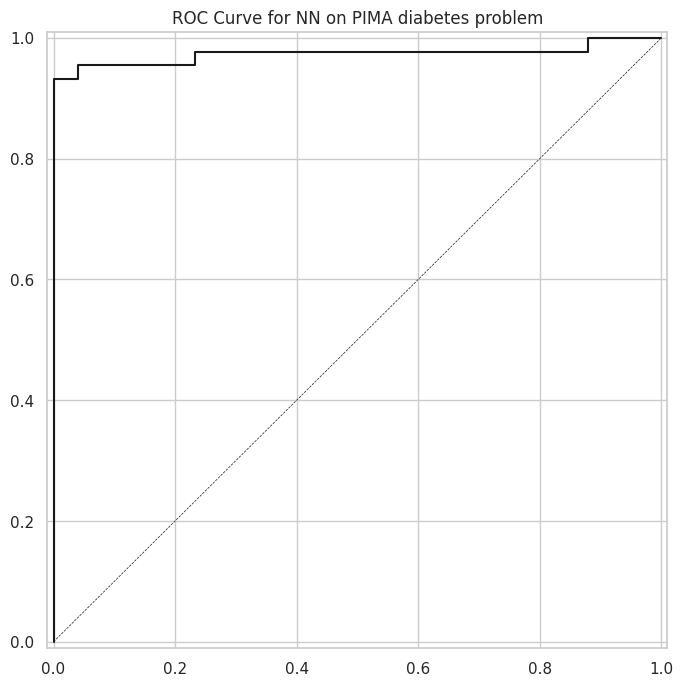

In [ ]:
my_model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
my_run_hist = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=800)
my_y_pred_prob_nn = my_model.predict(X_test_norm)
my_y_pred_class_nn = (my_y_pred_prob_nn > 0.5).astype("int32")
fig, ax = plt.subplots()
ax.plot(my_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
print('accuracy is {:.3f}'.format(accuracy_score(y_test,my_y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,my_y_pred_prob_nn)))

plot_roc(y_test, my_y_pred_prob_nn, 'NN')

##Different network structure

Epoch 1/1500
14/14 [==============================] - 2s 64ms/step - loss: 0.6528 - accuracy: 0.5869 - val_loss: 0.6545 - val_accuracy: 0.5524
Epoch 2/1500
14/14 [==============================] - 0s 20ms/step - loss: 0.6479 - accuracy: 0.5939 - val_loss: 0.6480 - val_accuracy: 0.6084
Epoch 3/1500
14/14 [==============================] - 0s 16ms/step - loss: 0.6429 - accuracy: 0.6009 - val_loss: 0.6412 - val_accuracy: 0.6154
Epoch 4/1500
14/14 [==============================] - 0s 11ms/step - loss: 0.6378 - accuracy: 0.6174 - val_loss: 0.6342 - val_accuracy: 0.6364
Epoch 5/1500
14/14 [==============================] - 0s 16ms/step - loss: 0.6325 - accuracy: 0.6268 - val_loss: 0.6269 - val_accuracy: 0.6364
Epoch 6/1500
14/14 [==============================] - 0s 16ms/step - loss: 0.6274 - accuracy: 0.6127 - val_loss: 0.6195 - val_accuracy: 0.6713
Epoch 7/1500
14/14 [==============================] - 0s 12ms/step - loss: 0.6220 - accuracy: 0.6103 - val_loss: 0.6119 - val_accuracy: 0.6783

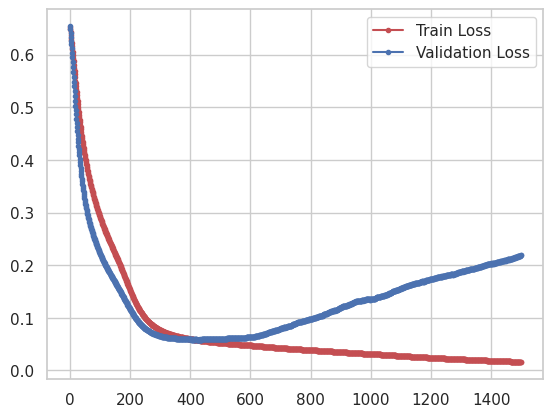

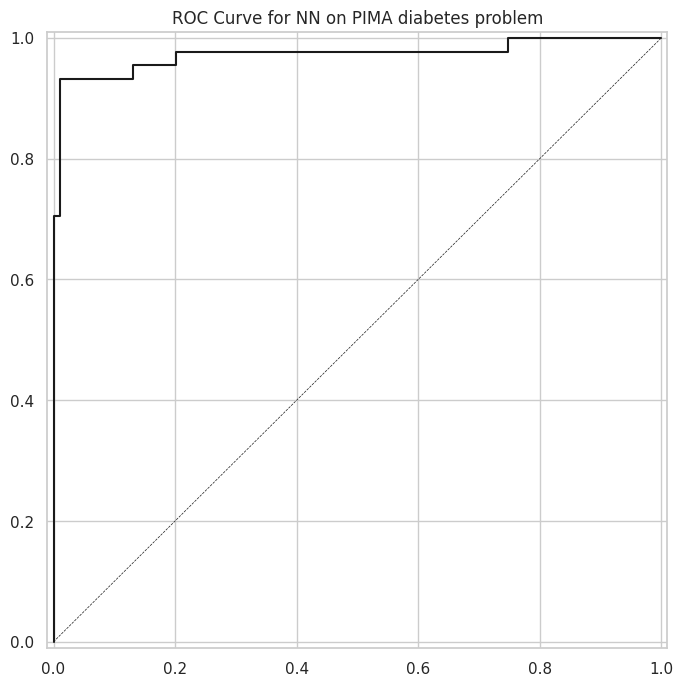

In [ ]:
my_model = Sequential([
    Dense(4, input_shape=(30,), activation="relu"),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])
my_model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
my_run_hist = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)
my_y_pred_prob_nn = my_model.predict(X_test_norm)
my_y_pred_class_nn = (my_y_pred_prob_nn > 0.5).astype("int32")
fig, ax = plt.subplots()
ax.plot(my_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
print('accuracy is {:.3f}'.format(accuracy_score(y_test,my_y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,my_y_pred_prob_nn)))

plot_roc(y_test, my_y_pred_prob_nn, 'NN')

Different epoch, lr, and structure

Epoch 1/1200
14/14 [==============================] - 1s 31ms/step - loss: 0.9145 - accuracy: 0.4460 - val_loss: 0.8560 - val_accuracy: 0.4965
Epoch 2/1200
14/14 [==============================] - 0s 7ms/step - loss: 0.9140 - accuracy: 0.4460 - val_loss: 0.8555 - val_accuracy: 0.4965
Epoch 3/1200
14/14 [==============================] - 0s 6ms/step - loss: 0.9135 - accuracy: 0.4460 - val_loss: 0.8549 - val_accuracy: 0.4965
Epoch 4/1200
14/14 [==============================] - 0s 7ms/step - loss: 0.9131 - accuracy: 0.4460 - val_loss: 0.8544 - val_accuracy: 0.4965
Epoch 5/1200
14/14 [==============================] - 0s 9ms/step - loss: 0.9126 - accuracy: 0.4460 - val_loss: 0.8538 - val_accuracy: 0.4965
Epoch 6/1200
14/14 [==============================] - 0s 7ms/step - loss: 0.9121 - accuracy: 0.4460 - val_loss: 0.8533 - val_accuracy: 0.4965
Epoch 7/1200
14/14 [==============================] - 0s 7ms/step - loss: 0.9116 - accuracy: 0.4460 - val_loss: 0.8528 - val_accuracy: 0.4965
Epoch

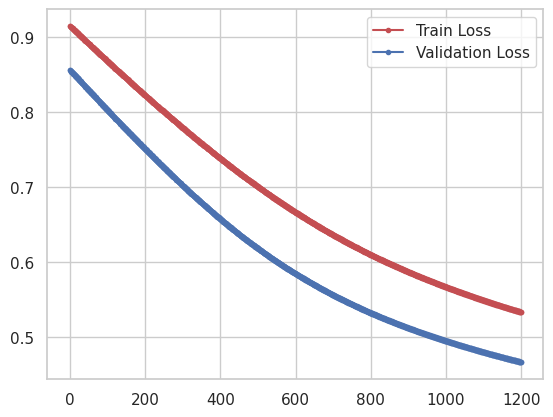

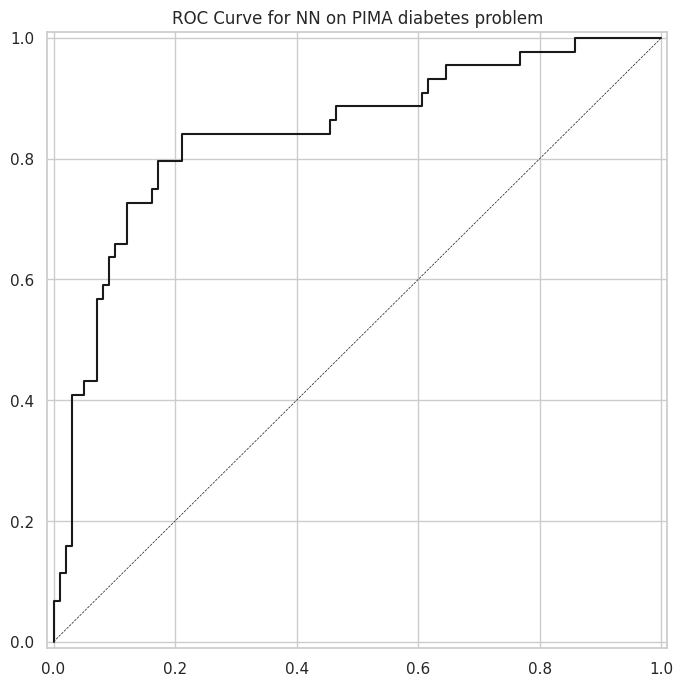

In [ ]:
my_model = Sequential([
    Dense(4, input_shape=(30,), activation="tanh"),
    Dense(4, activation="tanh"),
    Dense(4, activation="tanh"),
    Dense(1, activation="sigmoid")
])
my_model.compile(SGD(learning_rate = .00001), "binary_crossentropy", metrics=["accuracy"])
my_run_hist = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1200)
my_y_pred_prob_nn = my_model.predict(X_test_norm)
my_y_pred_class_nn = (my_y_pred_prob_nn > 0.5).astype("int32")
fig, ax = plt.subplots()
ax.plot(my_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
print('accuracy is {:.3f}'.format(accuracy_score(y_test,my_y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,my_y_pred_prob_nn)))

plot_roc(y_test, my_y_pred_prob_nn, 'NN')

Epoch 1/1000
14/14 [==============================] - 3s 61ms/step - loss: 0.6912 - accuracy: 0.3709 - val_loss: 0.6934 - val_accuracy: 0.3776
Epoch 2/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.6899 - accuracy: 0.3779 - val_loss: 0.6917 - val_accuracy: 0.3776
Epoch 3/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.6886 - accuracy: 0.4014 - val_loss: 0.6900 - val_accuracy: 0.3776
Epoch 4/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.6872 - accuracy: 0.4061 - val_loss: 0.6884 - val_accuracy: 0.4126
Epoch 5/1000
14/14 [==============================] - 0s 15ms/step - loss: 0.6859 - accuracy: 0.4108 - val_loss: 0.6867 - val_accuracy: 0.4406
Epoch 6/1000
14/14 [==============================] - 0s 15ms/step - loss: 0.6846 - accuracy: 0.4131 - val_loss: 0.6851 - val_accuracy: 0.4476
Epoch 7/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.6833 - accuracy: 0.4202 - val_loss: 0.6835 - val_accuracy: 0.4615

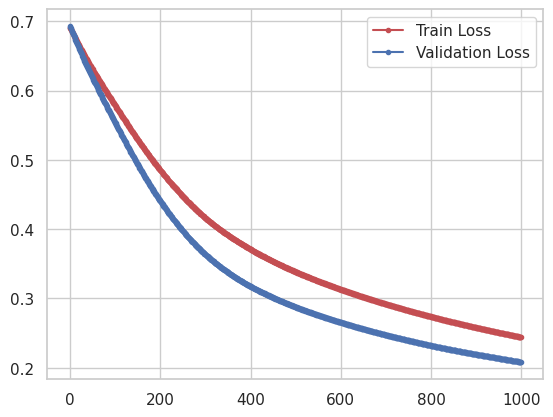

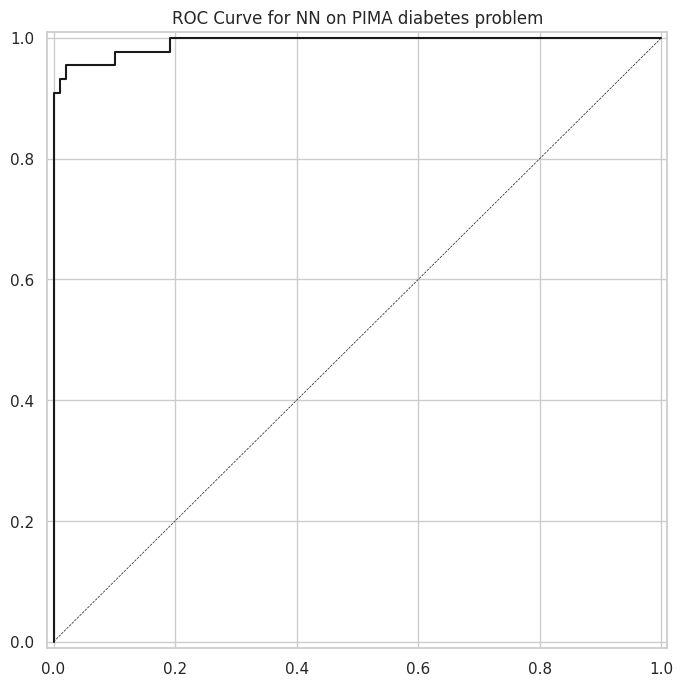

In [ ]:
my_model = Sequential([
    Dense(6, input_shape=(30,), activation="relu"),
    Dense(3, activation="relu"),
    Dense(1, activation="sigmoid")
])
my_model.compile(SGD(learning_rate = .0005), "binary_crossentropy", metrics=["accuracy"])
my_run_hist = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)
my_y_pred_prob_nn = my_model.predict(X_test_norm)
my_y_pred_class_nn = (my_y_pred_prob_nn > 0.5).astype("int32")
fig, ax = plt.subplots()
ax.plot(my_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
print('accuracy is {:.4f}'.format(accuracy_score(y_test,my_y_pred_class_nn)))
print('roc-auc is {:.4f}'.format(roc_auc_score(y_test,my_y_pred_prob_nn)))

plot_roc(y_test, my_y_pred_prob_nn, 'NN')

Epoch 1/1500
14/14 [==============================] - 2s 36ms/step - loss: 0.6334 - accuracy: 0.7512 - val_loss: 0.6272 - val_accuracy: 0.7832
Epoch 2/1500
14/14 [==============================] - 0s 9ms/step - loss: 0.6328 - accuracy: 0.7559 - val_loss: 0.6265 - val_accuracy: 0.7832
Epoch 3/1500
14/14 [==============================] - 0s 19ms/step - loss: 0.6322 - accuracy: 0.7559 - val_loss: 0.6257 - val_accuracy: 0.7832
Epoch 4/1500
14/14 [==============================] - 0s 14ms/step - loss: 0.6316 - accuracy: 0.7559 - val_loss: 0.6250 - val_accuracy: 0.7832
Epoch 5/1500
14/14 [==============================] - 0s 9ms/step - loss: 0.6310 - accuracy: 0.7559 - val_loss: 0.6242 - val_accuracy: 0.7832
Epoch 6/1500
14/14 [==============================] - 0s 11ms/step - loss: 0.6304 - accuracy: 0.7559 - val_loss: 0.6235 - val_accuracy: 0.7832
Epoch 7/1500
14/14 [==============================] - 0s 8ms/step - loss: 0.6297 - accuracy: 0.7606 - val_loss: 0.6227 - val_accuracy: 0.7832
Ep

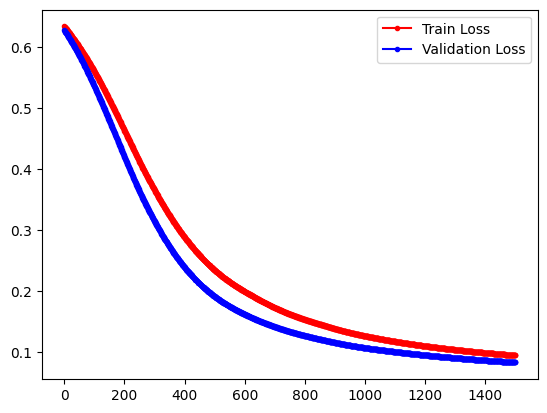

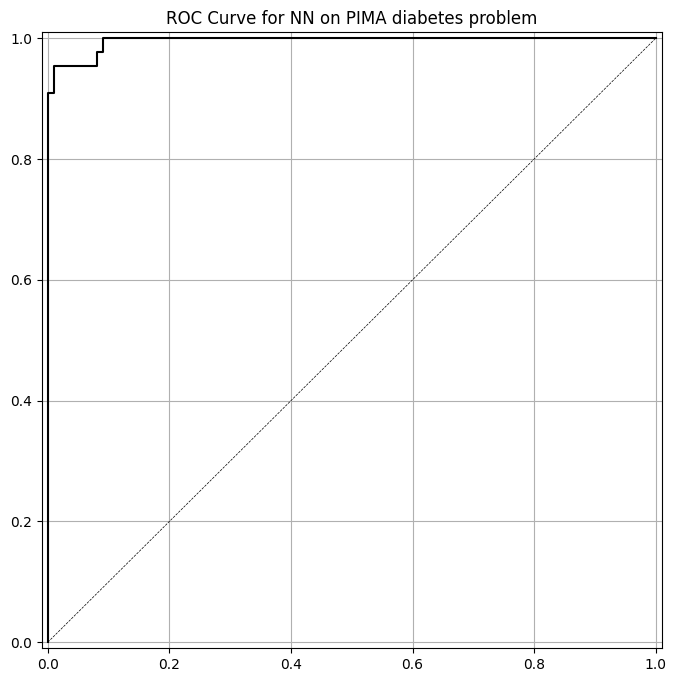

In [ ]:
my_model = Sequential([
    Dense(6, input_shape=(30,), activation="relu"),
    Dense(3, activation="relu"),
    Dense(1, activation="sigmoid")
])
my_model.compile(SGD(learning_rate = .0005), "binary_crossentropy", metrics=["accuracy"])
my_run_hist = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)
my_y_pred_prob_nn = my_model.predict(X_test_norm)
my_y_pred_class_nn = (my_y_pred_prob_nn > 0.5).astype("int32")
fig, ax = plt.subplots()
ax.plot(my_run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
print('accuracy is {:.4f}'.format(accuracy_score(y_test,my_y_pred_class_nn)))
print('roc-auc is {:.4f}'.format(roc_auc_score(y_test,my_y_pred_prob_nn)))

plot_roc(y_test, my_y_pred_prob_nn, 'NN')

Epoch 1/2000
14/14 [==============================] - 1s 19ms/step - loss: 0.8436 - accuracy: 0.1362 - val_loss: 0.8709 - val_accuracy: 0.1259
Epoch 2/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.8411 - accuracy: 0.1362 - val_loss: 0.8678 - val_accuracy: 0.1259
Epoch 3/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.8386 - accuracy: 0.1385 - val_loss: 0.8648 - val_accuracy: 0.1259
Epoch 4/2000
14/14 [==============================] - 0s 6ms/step - loss: 0.8362 - accuracy: 0.1408 - val_loss: 0.8618 - val_accuracy: 0.1259
Epoch 5/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.8338 - accuracy: 0.1408 - val_loss: 0.8590 - val_accuracy: 0.1329
Epoch 6/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.8315 - accuracy: 0.1408 - val_loss: 0.8561 - val_accuracy: 0.1399
Epoch 7/2000
14/14 [==============================] - 0s 6ms/step - loss: 0.8291 - accuracy: 0.1432 - val_loss: 0.8534 - val_accuracy: 0.1399
Epoch

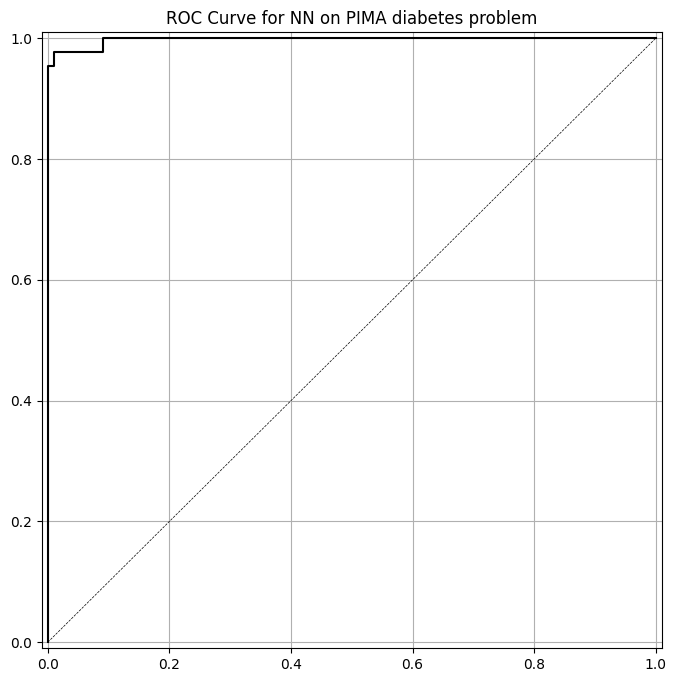

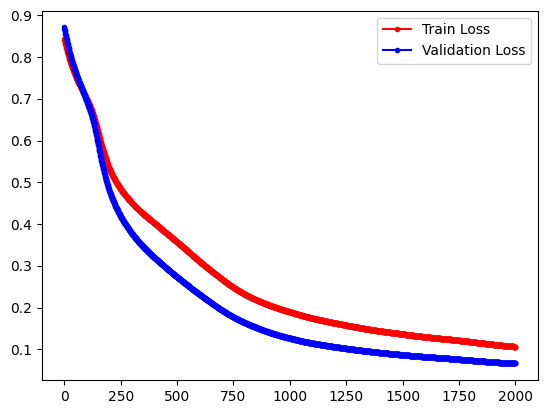

In [ ]:
my_model = Sequential([
    Dense(6, input_shape=(30,), activation="relu"),
    Dense(3, activation="relu"),
    Dense(1, activation="sigmoid")
])
my_model.compile(SGD(learning_rate = .0005), "binary_crossentropy", metrics=["accuracy"])
my_run_hist = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=2000)
my_y_pred_prob_nn = my_model.predict(X_test_norm)
my_y_pred_class_nn = (my_y_pred_prob_nn > 0.5).astype("int32")
plot_roc(y_test, my_y_pred_prob_nn, 'NN')
plot_loss(my_run_hist, y_test, my_y_pred_class_nn, my_y_pred_prob_nn)

Epoch 1/2000
14/14 [==============================] - 1s 23ms/step - loss: 0.7523 - accuracy: 0.4038 - val_loss: 0.7666 - val_accuracy: 0.3497
Epoch 2/2000
14/14 [==============================] - 0s 7ms/step - loss: 0.7507 - accuracy: 0.4085 - val_loss: 0.7647 - val_accuracy: 0.3566
Epoch 3/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.7491 - accuracy: 0.4108 - val_loss: 0.7627 - val_accuracy: 0.3566
Epoch 4/2000
14/14 [==============================] - 0s 9ms/step - loss: 0.7475 - accuracy: 0.4178 - val_loss: 0.7608 - val_accuracy: 0.3636
Epoch 5/2000
14/14 [==============================] - 0s 16ms/step - loss: 0.7459 - accuracy: 0.4178 - val_loss: 0.7589 - val_accuracy: 0.3706
Epoch 6/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.7444 - accuracy: 0.4225 - val_loss: 0.7570 - val_accuracy: 0.3776
Epoch 7/2000
14/14 [==============================] - 0s 8ms/step - loss: 0.7428 - accuracy: 0.4225 - val_loss: 0.7551 - val_accuracy: 0.3776
Epoc

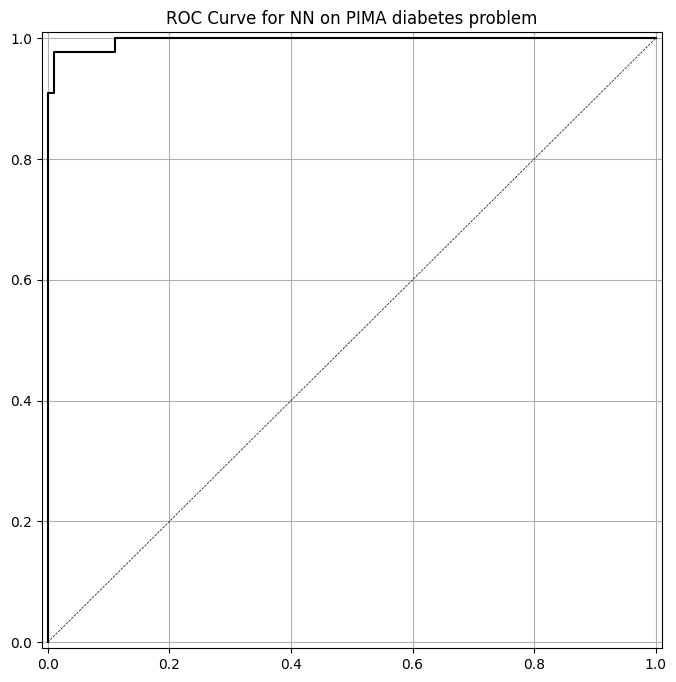

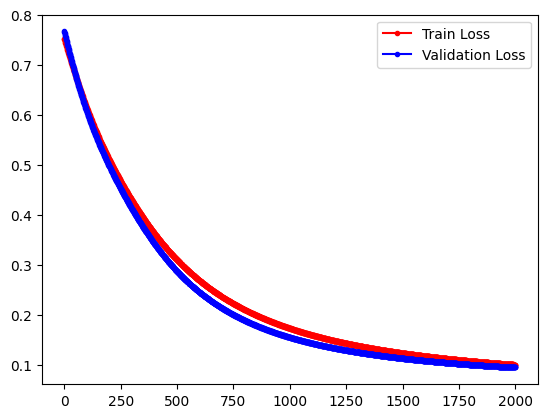

In [ ]:
my_model = Sequential([
    Dense(6, input_shape=(30,), activation="tanh"),
    Dense(3, activation="tanh"),
    Dense(1, activation="sigmoid")
])
my_model.compile(SGD(learning_rate = .0005), "binary_crossentropy", metrics=["accuracy"])
my_run_hist = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=2000)
my_y_pred_prob_nn = my_model.predict(X_test_norm)
my_y_pred_class_nn = (my_y_pred_prob_nn > 0.5).astype("int32")


plot_roc(y_test, my_y_pred_prob_nn, 'NN')
plot_loss(my_run_hist, y_test, my_y_pred_class_nn, my_y_pred_prob_nn)

Neural networks are machine learning techniques that utilized the behavior of the neurons of the human brain. Keras is an API that provides service on creating deep learning models.

Building a neural network with Keras is pretty intuitive. To build one, call a sequential function and add layers with the Dense function. State the number of neurons and the activation function inside the dense function. After that, we can compile them while also adding some learning rates, loss functions, epochs, optimizers, regularizers, etc.

There are multiple ways to evaluate the performance of a neural network. One of which is by using the sklearn's roc_score and accuracy functions. And from this activity, signficantly increasing the learning rate decreases the accuracy of the model. In addition, sometimes adding more epoch can decrease the accuracy of the model. From above, although the training loss decrease with more epoch, the validation loss keeps increasing more than the former.

On the other hand, I tried to run two networks with 12 neurons but the first one has 6 neurons on 2 layers while the other one has 4 neurons on 3 layers. Their accuracy did not differ from each other while their roc score are almost the same. Furthermore, a network with 3 layers with 6 neurons each performed worst compared to the network with only 2 layers. Adding more layers does not equate to a more accurate model.

The balance of learning rate, epoch, neurons, and layers is crucial for the accuracy of the dataset. Their values differ on each situation and on the dataset. Trying to find them manually requires a lot of effort, time, and resources. Therefore, I want to learn on how to properly design a network and a technique that finds the optimal learning rate, epoch, etc.